<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [65]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [66]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [67]:
from google.colab import drive
drive.mount('/content/gdrive')
#data = pd.read_csv('./train.csv')
data = pd.read_csv('/content/gdrive/My Drive/2022.03.03_stepic_ml/train.csv')
data.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [68]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [69]:
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'],errors = 'coerce')

In [70]:
data = data.reset_index()

In [71]:
np.any(np.isnan(data[num_cols])) # True

True

In [72]:
np.all(np.isfinite(data[num_cols])) # False

False

In [131]:
data.isna().sum()

index                       0
ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [74]:
data['TotalSpent'] = data['TotalSpent'].fillna(0)

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [75]:
data[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ClientPeriod     5282 non-null   int64  
 1   MonthlySpending  5282 non-null   float64
 2   TotalSpent       5282 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 123.9 KB


,ClientPeriod,MonthlySpending,TotalSpent
count,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,2287.486161
std,24.550326,30.176464,2269.049195
min,0.000000,18.250000,0.000000
25%,9.000000,35.462500,395.725000
50%,29.000000,70.400000,1405.650000
75%,55.000000,90.050000,3795.212500
max,72.000000,118.750000,8684.800000


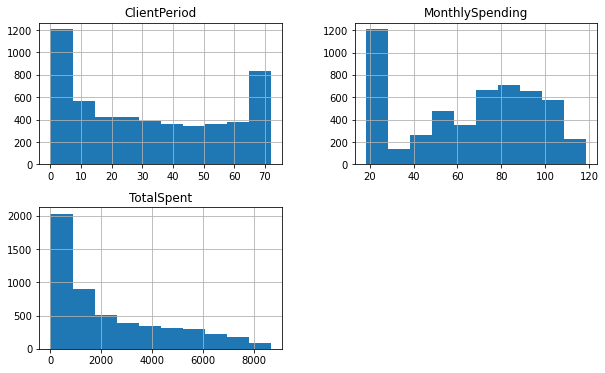

In [76]:
data[num_cols].hist(figsize=(10, 6))
data[num_cols].describe()

#plt.hist(data['TotalSpent'], density=False, bins=30)

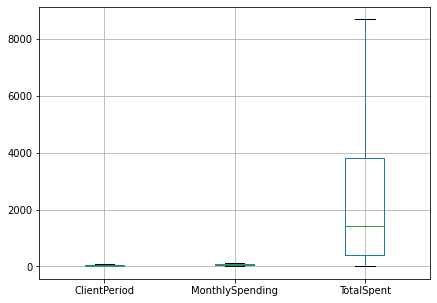

In [133]:
data.boxplot(column=num_cols, figsize=(7, 5))

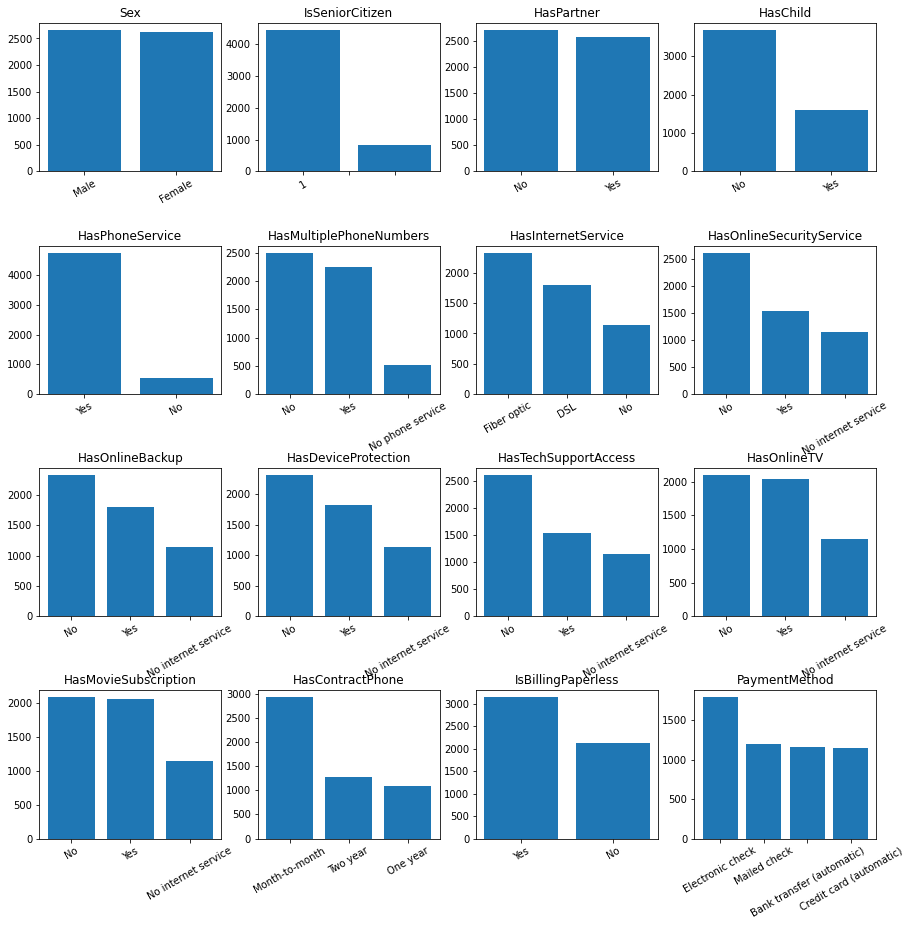

In [141]:
fig, ax = plt.subplots(4, 4, figsize=(15,15))
ax = ax.ravel()

for i, col in enumerate(cat_cols):
  ax[i].set_title(col)
  col_values = data[col].value_counts()
  ax[i].bar(col_values.index, col_values.values)
  ax[i].set_xticklabels(col_values.index, rotation = 30)
  

plt.subplots_adjust(hspace = 0.5)
fig.show()

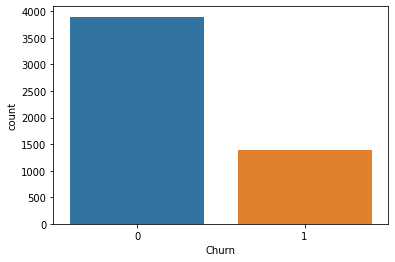

In [159]:
sns.countplot(x='Churn', data=data)
plt.show()
# def plt_cat(feature):
#   print(data['Sex'].value_counts())
#   _, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
#   sns.countplot(x=feature, data=data, ax=axes[0])
#   sns.countplot(x=feature, hue='Churn', data=data);

In [147]:
# i = 0
# if i < len(cat_cols):
#   plt_cat(cat_cols[i])
#   i+=1

Классы являются сбаллансированными, нет различия между классами в 20 раз и более


(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [162]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer

In [192]:
prepare_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_cols),
        #("cat1", LabelEncoder(), cat_cols),
        ("cat2", OneHotEncoder(), cat_cols)
    ])

full_pipeline = Pipeline([
        ("preparation", prepare_pipeline),
        ("linear", LogisticRegression(solver = 'liblinear', random_state=42))
    ])

In [193]:
param_grid = [
        {'linear__penalty':['l1', 'l2'],
         'linear__C': [100, 10, 1, 0.1, 0.01, 0.001]
         }
    ]
grid_searcher = GridSearchCV(full_pipeline, param_grid, scoring='roc_auc', verbose=4)

In [194]:
X_train, X_test, y_train, y_test = train_test_split(data[feature_cols], data[target_col])
grid_searcher.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .linear__C=100, linear__penalty=l1;, score=0.829 total time=   0.4s
[CV 2/5] END .linear__C=100, linear__penalty=l1;, score=0.831 total time=   0.4s
[CV 3/5] END .linear__C=100, linear__penalty=l1;, score=0.849 total time=   0.4s
[CV 4/5] END .linear__C=100, linear__penalty=l1;, score=0.848 total time=   0.4s
[CV 5/5] END .linear__C=100, linear__penalty=l1;, score=0.851 total time=   0.4s
[CV 1/5] END .linear__C=100, linear__penalty=l2;, score=0.829 total time=   0.1s
[CV 2/5] END .linear__C=100, linear__penalty=l2;, score=0.831 total time=   0.1s
[CV 3/5] END .linear__C=100, linear__penalty=l2;, score=0.849 total time=   0.1s
[CV 4/5] END .linear__C=100, linear__penalty=l2;, score=0.848 total time=   0.1s
[CV 5/5] END .linear__C=100, linear__penalty=l2;, score=0.851 total time=   0.1s
[CV 1/5] END ..linear__C=10, linear__penalty=l1;, score=0.829 total time=   0.3s
[CV 2/5] END ..linear__C=10, linear__penalty=l1;

GridSearchCV(estimator=Pipeline(steps=[('preparation',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['ClientPeriod',
                                                                          'MonthlySpending',
                                                                          'TotalSpent']),
                                                                        ('cat2',
                                                                         OneHotEncoder(),
                                                                         ['Sex',
                                                                          'IsSeniorCitizen',
                                                                          'HasPartner',
                                                                    

In [195]:
grid_searcher.best_params_

{'linear__C': 10, 'linear__penalty': 'l1'}

In [196]:
grid_searcher.best_score_

0.8413287353252805

0.8414720268476868

In [95]:
normalized_num_cols=(data[num_cols]-data[num_cols].min())/(data[num_cols].max()-data[num_cols].min())
#normalized_num_cols.head()

In [190]:
label_encoder = LabelEncoder()
encoded_categorical_cols = pd.DataFrame()
for i in cat_cols:
 encoded_categorical_cols[i] = label_encoder.fit_transform(data[i])
#encoded_categorical_cols.head()

In [97]:
onehot_encoder = OneHotEncoder(sparse=False)
encoded_categorical_cols = pd.DataFrame(onehot_encoder.fit_transform(encoded_categorical_cols))
#encoded_categorical_cols.head()

In [98]:
df = normalized_num_cols.join(encoded_categorical_cols)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(df, data[target_col])

In [106]:
logit_searcher = LogisticRegressionCV(refit=True, scoring='roc_auc')
logit_searcher.fit(X_train, y_train);
roc_auc_score(y_test, logit_searcher.predict(X_test))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.7334648703640904

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

0.7335321151110625

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [107]:
pip install catboost

In [197]:
from catboost import CatBoostClassifier
import catboost

In [198]:
param_grid = {
        "learning_rate":[0.025, 0.03, 0.04, 0.1],
        "min_data_in_leaf":[85, 90, 95],
        "depth": [3, 4, 5, 6, 10],
        "iterations":[120, 150, 180, 200]
         } # вот разные параметры, которые мы будем пробовать
catgrid = CatBoostClassifier(cat_features=cat_cols, random_seed=42, verbose=False, eval_metric='AUC')
result = catgrid.grid_search(param_grid, X_train, y=y_train)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.


bestTest = 0.8395327942
bestIteration = 119

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8395328	best: 0.8395328 (0)	total: 506ms	remaining: 2m 1s

bestTest = 0.8426243568
bestIteration = 119

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8426244	best: 0.8426244 (1)	total: 999ms	remaining: 1m 58s

bestTest = 0.8401127175
bestIteration = 119

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8401127	best: 0.8426244 (1)	total: 1.48s	remaining: 1m 57s

bestTest = 0.8460222168
bestIteration = 82

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8460222	best: 0.8460222 (3)	total: 1.97s	remaining: 1m 56s

b

In [199]:
result['params']

{'depth': 5, 'iterations': 120, 'learning_rate': 0.1, 'min_data_in_leaf': 85}

In [200]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, catgrid.predict_proba(X_train)[:, 1])

0.8620908823071805

In [203]:
roc_auc_score(y_test, catgrid.predict_proba(X_test)[:, 1])

0.8541003324514784

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [204]:
best_model = CatBoostClassifier(verbose = False, 
                                cat_features = cat_cols, 
                                min_data_in_leaf = 85, 
                                iterations = 120, 
                                learning_rate = 0.1, 
                                depth = 5)

In [205]:
best_model.fit(data[feature_cols], data[target_col])

In [230]:
X_test = pd.read_csv('/content/gdrive/My Drive/2022.03.03_stepic_ml/test.csv')
submission = pd.read_csv('/content/gdrive/My Drive/2022.03.03_stepic_ml/submission.csv')


In [231]:
submission['Churn'] = submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('/content/gdrive/My Drive/2022.03.03_stepic_ml/submission_final.csv', index=False)

In [220]:
#best_model.predict_proba(X_test)
#best_model.predict(X_test)

array([[0.95146413, 0.04853587],
       [0.32781387, 0.67218613],
       [0.33139864, 0.66860136],
       ...,
       [0.16755709, 0.83244291],
       [0.41184192, 0.58815808],
       [0.98374125, 0.01625875]])

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.